# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [1]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

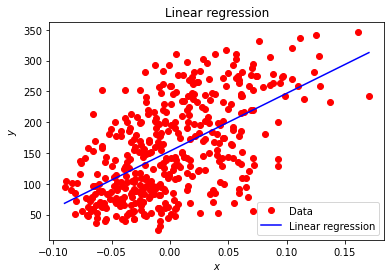

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [3]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [9]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

Definitions

Mean Squared Error (MSE):
   $$
   \text{MSE} = \mathbb{E}\left[(\hat{\theta}_m - \theta)^2\right]
   $$

Bias:
   $$
   \text{Bias}(\hat{\theta}_m) = \mathbb{E}[\hat{\theta}_m] - \theta
   $$

Variance:
   $$
   \text{Var}(\hat{\theta}_m) = \mathbb{E}\left[(\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])^2\right]
   $$





Decomposition of MSE

$$
(\hat{\theta}_m - \theta)^2 = (\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m] + \mathbb{E}[\hat{\theta}_m] - \theta)^2
$$

$$
(\hat{\theta}_m - \theta)^2 = (\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])^2 + 2(\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])(\mathbb{E}[\hat{\theta}_m] - \theta) + (\mathbb{E}[\hat{\theta}_m] - \theta)^2
$$

Taking the expectation of both sides:
$$
\mathbb{E}\left[(\hat{\theta}_m - \theta)^2\right] = \mathbb{E}\left[(\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])^2\right] + \mathbb{E}\left[2(\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])(\mathbb{E}[\hat{\theta}_m] - \theta)\right] + \mathbb{E}\left[(\mathbb{E}[\hat{\theta}_m] - \theta)^2\right]
$$

Simplify each term:
Variance:
   $$
   \mathbb{E}\left[(\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])^2\right] = \text{Var}(\hat{\theta}_m)
   $$

Bias Term:
   The term 
   $$
   \mathbb{E}\left[2(\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])(\mathbb{E}[\hat{\theta}_m] - \theta)\right]
   $$
   
   is zero because:
   $$
   \mathbb{E}\left[(\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m])(\mathbb{E}[\hat{\theta}_m] - \theta)\right] = (\mathbb{E}[\hat{\theta}_m] - \theta) \cdot \mathbb{E}\left[\hat{\theta}_m - \mathbb{E}[\hat{\theta}_m]\right] = (\mathbb{E}[\hat{\theta}_m] - \theta) \cdot 0 = 0
   $$

Bias Squared:
   $$
   \mathbb{E}\left[(\mathbb{E}[\hat{\theta}_m] - \theta)^2\right] = \text{Bias}(\hat{\theta}_m)^2
   $$

Combining these results:
$$
\text{MSE} = \text{Var}(\hat{\theta}_m) + \text{Bias}(\hat{\theta}_m)^2
$$



### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

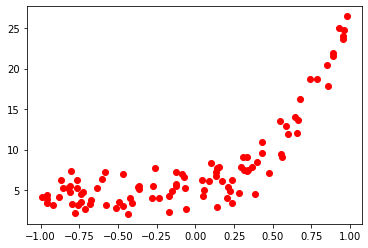

In [10]:
%matplotlib inline

def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

Best Polynomial Degree: {'poly__degree': 3}
Best Score (Negative MSE): -2.5006394260865106
Test MSE: 2.655717064656243


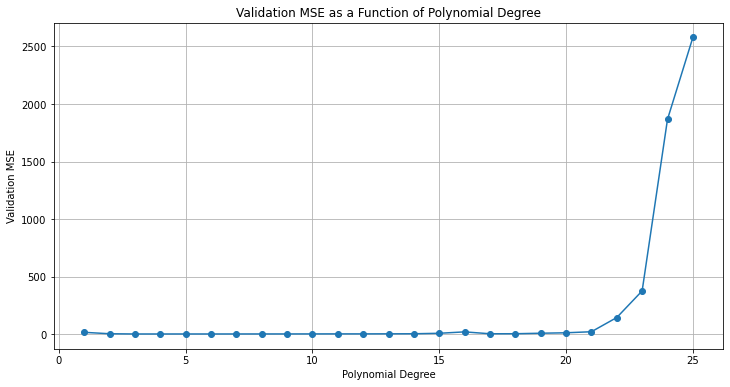

Models with low polynomial degrees (degree 1) typically have high bias because they might underfit the data.
Models with high polynomial degrees (e.g., degree 15 or higher) usually have high variance because they may overfit the training data, capturing noise as well as the signal.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

# Reshape X to a 2D array (n_samples, n_features)
X = X.reshape(-1, 1)


# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline that includes polynomial feature generation and linear regression
def create_pipeline(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ])

# Range of polynomial degrees to search
param_grid = {'poly__degree': np.arange(1, 26)}

# Initialize GridSearchCV
grid_search = GridSearchCV(create_pipeline(1), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the data (een manier om hyperparameters af te stemmen door meerdere combinaties van parameters te proberen)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Polynomial Degree:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# Plot learning curve (validation MSE vs polynomial degree)
results = grid_search.cv_results_
degrees = results['param_poly__degree'].data
mean_test_scores = -results['mean_test_score']  # Convert negative MSE to positive MSE

plt.figure(figsize=(12, 6))
plt.plot(degrees, mean_test_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation MSE')
plt.title('Validation MSE as a Function of Polynomial Degree')
plt.grid(True)
plt.show()


print("Models with low polynomial degrees (degree 1) typically have high bias because they might underfit the data.")
print("Models with high polynomial degrees (e.g., degree 15 or higher) usually have high variance because they may overfit the training data, capturing noise as well as the signal.")

Beste Graad van Polynoom: {'poly__degree': 1}
Beste Score (Negatieve MSE): -3167.853606647681
Test MSE: 2821.7385595843757


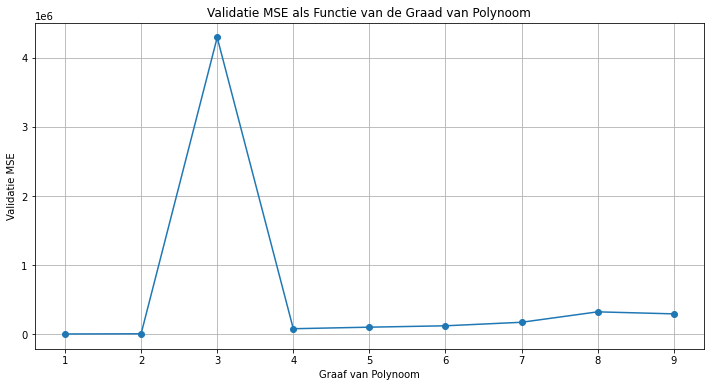

In [22]:
#With diabetes dataset:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that includes polynomial feature generation and linear regression
def create_pipeline(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ])

# Define the range of polynomial degrees to search
param_grid = {'poly__degree': np.arange(1, 10)} #hoe hoger aantal graden, hoe langer het duurt

# Initialize GridSearchCV
grid_search = GridSearchCV(create_pipeline(1), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Beste Graad van Polynoom:", grid_search.best_params_)
print("Beste Score (Negatieve MSE):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# Plot learning curve (validation MSE vs polynomial degree)
results = grid_search.cv_results_
degrees = results['param_poly__degree'].data
mean_test_scores = -results['mean_test_score']  # Convert negatieve MSE naar positieve MSE

plt.figure(figsize=(12, 6))
plt.plot(degrees, mean_test_scores, marker='o')
plt.xlabel('Graaf van Polynoom')
plt.ylabel('Validatie MSE')
plt.title('Validatie MSE als Functie van de Graad van Polynoom')
plt.grid(True)
plt.show()


### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

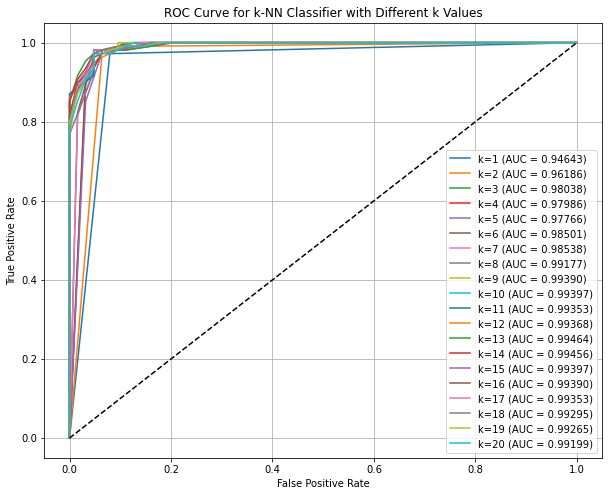

In [23]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import mode

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_normalized = normalize(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

def euclidean_distance_matrix(X_train, X_test):
    dists = np.sqrt(
        np.sum(X_train**2, axis=1).reshape(-1, 1) + 
        np.sum(X_test**2, axis=1) - 
        2 * np.dot(X_train, X_test.T)
    )
    return dists.T  # transpose

def predict_knn_prob(X_train, y_train, X_test, k):
    # Calculate the distance matrix
    distances = euclidean_distance_matrix(X_train, X_test)
    
    # Get the indices of the k-nearest neighbors
    nearest_neighbor_indices = np.argsort(distances, axis=1)[:, :k]
    
    # Get the labels of the k-nearest neighbors
    nearest_neighbor_labels = y_train[nearest_neighbor_indices]
    
    # Calculate the probability as the fraction of positive labels (class 1)
    probabilities = np.mean(nearest_neighbor_labels, axis=1)
    
    return probabilities

# Evaluate the classifier for different values of k and plot ROC curves
k_values = list(range(1, 21))  # select a few k values to compare
plt.figure(figsize=(10, 8))

for k in k_values:
    # Get predicted probabilities for class 1
    y_prob = predict_knn_prob(X_train, y_train, X_test, k)
    
    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'k={k} (AUC = {roc_auc:.5f})')

# Plot the diagonal (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Customize the plot
plt.title('ROC Curve for k-NN Classifier with Different k Values')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778


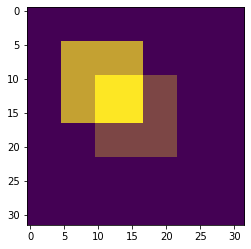

In [14]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

The $F_{1}$ score is defined as:
$$
F_{1} = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$

With precision being defined as $Precision = \frac{TP}{TP+FP}$ and recall as $Recall = \frac{TP}{TP+FN}$. If we use this in the earlier described equation, we can derive the expression for $F_{1}$ to be equal to:
$$
F_{1} = \frac{2 \times \frac{TP}{TP+FP} \times \frac{TP}{TP+FN}}{\frac{TP}{TP+FP} + \frac{TP}{TP+FN}}
$$
Which we can then further reduce to:
$$
F_{1} = \frac{2 \times \frac{TP^2}{(TP+FP)(TP+FN)}}{\frac{TP}{TP+FP}+\frac{TP}{TP+FN}}
$$
We can now get rid of the fraction in the numerator as follows:
$$
F_{1} = 2 \times\frac{\frac{TP^2}{(TP+FP)(TP+FN)}}{\frac{TP \times (TP+FN)  + TP \times (TP+FP)}{(TP+FP) \times (TP+FN)}}
$$
In this case, the term $(TP+FP)\times(TP+FN)$ cancels out as it is present on both sides of the fraction. This then looks like:
$$
F_{1} = 2 \times \frac{TP^2}{TP \times (TP+FN) + TP \times (TP+FP)}
$$
Which can finally be reduced to:
$$
F_{1} = 2 \times \frac{TP}{2TP+FN+FP}
$$

This is equal to the dice score as |$A\cap B|$ is equal to TP, $|A|$ is equal to $TP + FN$ and $|B|$ is equal to $TP + FP$.